In [1]:
# ------------------------
# Unzip datasets if you haven't already downloaded and extracted them:
# Uncomment the lines below to unzip the datasets once.
# ------------------------

# import zipfile
# with zipfile.ZipFile("Kaggle.zip", "r") as zip_ref:
#     zip_ref.extractall("Kaggle_dataset")
# with zipfile.ZipFile("STARE.zip", "r") as zip_ref:
#     zip_ref.extractall("STARE_dataset")

# ------------------------
# If you notice any folder naming issues (like trailing spaces), uncomment and run the fix once:
# import os
# os.rename("Kaggle_dataset/OCT2017 ", "Kaggle_dataset/OCT2017")




In [2]:
!python --version

Python 3.10.11


In [1]:
!pip install numpy pillow matplotlib scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
import os

print("Kaggle contents:", os.listdir("Kaggle_dataset"))
print("STARE contents:", os.listdir("STARE_dataset"))


Kaggle contents: ['OCT2017']
STARE contents: ['im0001.ppm', 'im0002.ppm', 'im0003.ppm', 'im0004.ppm', 'im0005.ppm', 'im0006.ppm', 'im0007.ppm', 'im0008.ppm', 'im0009.ppm', 'im0010.ppm', 'im0011.ppm', 'im0012.ppm', 'im0013.ppm', 'im0014.ppm', 'im0015.ppm', 'im0016.ppm', 'im0017.ppm', 'im0018.ppm', 'im0019.ppm', 'im0020.ppm', 'im0021.ppm', 'im0022.ppm', 'im0023.ppm', 'im0024.ppm', 'im0025.ppm', 'im0026.ppm', 'im0027.ppm', 'im0028.ppm', 'im0029.ppm', 'im0030.ppm', 'im0031.ppm', 'im0032.ppm', 'im0033.ppm', 'im0034.ppm', 'im0035.ppm', 'im0036.ppm', 'im0037.ppm', 'im0038.ppm', 'im0039.ppm', 'im0040.ppm', 'im0041.ppm', 'im0042.ppm', 'im0043.ppm', 'im0044.ppm', 'im0045.ppm', 'im0046.ppm', 'im0048.ppm', 'im0049.ppm', 'im0050.ppm', 'im0051.ppm', 'im0052.ppm', 'im0053.ppm', 'im0054.ppm', 'im0055.ppm', 'im0056.ppm', 'im0057.ppm', 'im0058.ppm', 'im0059.ppm', 'im0060.ppm', 'im0061.ppm', 'im0062.ppm', 'im0063.ppm', 'im0064.ppm', 'im0065.ppm', 'im0066.ppm', 'im0067.ppm', 'im0068.ppm', 'im0069.ppm', 'i

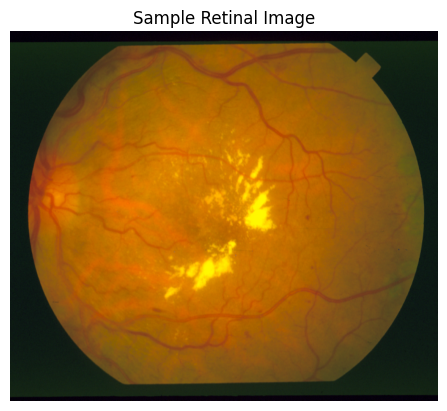

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "STARE_dataset/im0001.ppm"

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title("Sample Retinal Image")
plt.show()



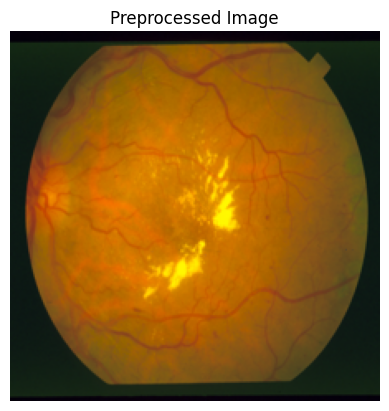

In [5]:
import numpy as np

# Resize to 224x224 and normalize to [0, 1]
img_resized = img.resize((224, 224))
img_array = np.array(img_resized) / 255.0  # normalize pixel values

plt.imshow(img_array)
plt.axis('off')
plt.title("Preprocessed Image")
plt.show()


In [6]:
import os
from PIL import Image
import numpy as np

# Path to your STARE dataset folder
input_folder = "STARE_dataset"
output_folder = "STARE_preprocessed"
os.makedirs(output_folder, exist_ok=True)

# Function to preprocess a single image
def preprocess_image(image_path, size=(256, 256)):
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    img = img.resize(size)  # Resize
    img_array = np.array(img) / 255.0  # Normalize to [0,1]
    return img_array

# Loop through all .ppm files and preprocess
for filename in os.listdir(input_folder):
    if filename.endswith(".ppm"):
        img_path = os.path.join(input_folder, filename)
        preprocessed = preprocess_image(img_path)
        
        # Save as a .npy (NumPy array) file
        output_path = os.path.join(output_folder, filename.replace(".ppm", ".npy"))
        np.save(output_path, preprocessed)

print("✅ Preprocessing complete! Images saved to:", output_folder)


✅ Preprocessing complete! Images saved to: STARE_preprocessed


In [7]:
import os
from PIL import Image
import numpy as np

# Define paths
input_root = "Kaggle_dataset/OCT2017/OCT2017/train"
output_root = "Kaggle_preprocessed"
os.makedirs(output_root, exist_ok=True)

# Define preprocessing function
def preprocess_image(image_path, size=(256, 256)):
    img = Image.open(image_path).convert("L")  # Grayscale
    img = img.resize(size)
    img_array = np.array(img, dtype=np.float32) / 255.0
    return img_array

# Loop through each class folder
for label_folder in os.listdir(input_root):
    label_path = os.path.join(input_root, label_folder)
    if os.path.isdir(label_path):
        output_label_path = os.path.join(output_root, label_folder)
        os.makedirs(output_label_path, exist_ok=True)
        
        for filename in os.listdir(label_path):
            if filename.lower().endswith((".jpeg", ".jpg", ".png")):
                image_path = os.path.join(label_path, filename)
                processed = preprocess_image(image_path)
                
                # Save preprocessed image as .npy
                save_path = os.path.join(output_label_path, os.path.splitext(filename)[0] + ".npy")
                np.save(save_path, processed)

print("✅ Kaggle OCT dataset preprocessed and saved to:", output_root)


✅ Kaggle OCT dataset preprocessed and saved to: Kaggle_preprocessed


In [8]:
import glob

all_npy_files = glob.glob("Kaggle_preprocessed/**/*.npy", recursive=True)
print(f"🔍 Found {len(all_npy_files)} .npy files in Kaggle_preprocessed")


🔍 Found 228633 .npy files in Kaggle_preprocessed


In [9]:
import os
print(os.getcwd())


C:\Users\miama\Desktop\alzheimer


In [10]:
!pip install scikit-learn



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


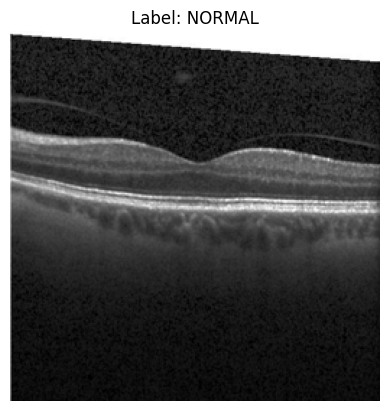

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Set the root folder for the preprocessed data
root = "Kaggle_preprocessed"

# Loop until we find a non-empty label folder
while True:
    label = random.choice(os.listdir(root))
    label_path = os.path.join(root, label)
    files = [f for f in os.listdir(label_path) if f.endswith(".npy")]
    if files:
        break  # Found a non-empty folder

# Choose a random .npy file from that folder
random_file = random.choice(files)
file_path = os.path.join(label_path, random_file)

# Load and display
img_array = np.load(file_path)
plt.imshow(img_array, cmap='gray')
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()



In [12]:
import os
import shutil

def organize_npy_files_by_class(root_dir):
    for filename in os.listdir(root_dir):
        if filename.endswith(".npy"):
            # Extract class name (e.g., "NORMAL" from "NORMAL-1384-1.npy")
            class_name = filename.split("-")[0]
            class_folder = os.path.join(root_dir, class_name)

            # Create class folder if it doesn't exist
            os.makedirs(class_folder, exist_ok=True)

            # Move file into corresponding class folder
            src_path = os.path.join(root_dir, filename)
            dst_path = os.path.join(class_folder, filename)
            shutil.move(src_path, dst_path)

    print("✅ Files reorganized by class!")

# Use this on both train and val directories
organize_npy_files_by_class("Kaggle_preprocessed/train")
organize_npy_files_by_class("Kaggle_preprocessed/val")


✅ Files reorganized by class!
✅ Files reorganized by class!


In [13]:
import os
import shutil

def organize_npy_files_by_class(root_dir):
    for filename in os.listdir(root_dir):
        if filename.endswith(".npy"):
            class_name = filename.split("-")[0]
            class_folder = os.path.join(root_dir, class_name)
            os.makedirs(class_folder, exist_ok=True)
            shutil.move(os.path.join(root_dir, filename), os.path.join(class_folder, filename))

organize_npy_files_by_class("Kaggle_preprocessed")


In [14]:
import os
import shutil
import random

# Paths
data_dir = "Kaggle_preprocessed"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")

# Create train and val directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# For each class folder
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path) and class_name not in ["train", "val"]:
        files = [f for f in os.listdir(class_path) if f.endswith(".npy")]
        random.shuffle(files)

        # Split 80% train, 20% val (adjust as needed)
        split_idx = int(len(files) * 0.8)

        train_files = files[:split_idx]
        val_files = files[split_idx:]

        # Create class subfolders in train and val
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

        # Move train files
        for f in train_files:
            shutil.move(os.path.join(class_path, f), os.path.join(train_class_dir, f))

        # Move val files
        for f in val_files:
            shutil.move(os.path.join(class_path, f), os.path.join(val_class_dir, f))

print("✅ Dataset split into train/val folders")




✅ Dataset split into train/val folders


In [15]:
import numpy as np
import os
import tensorflow as tf

class NpyBatchGenerator(tf.keras.utils.Sequence):
    def __init__(self, data_dir, batch_size=32, shuffle=True):
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.shuffle = shuffle

        # Automatically detect class folders
        self.labels = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
        self.label_to_index = {label: idx for idx, label in enumerate(self.labels)}
        self.num_classes = len(self.labels)

        # Collect file paths and labels
        self.file_paths = []
        self.file_labels = []

        for label in self.labels:
            folder = os.path.join(data_dir, label)
            for filename in os.listdir(folder):
                if filename.endswith(".npy"):
                    self.file_paths.append(os.path.join(folder, filename))
                    self.file_labels.append(self.label_to_index[label])

        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.file_paths) / self.batch_size))

    def __getitem__(self, idx):
        batch_paths = self.file_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_labels = self.file_labels[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_data = [np.load(path).astype(np.float32) for path in batch_paths]
        batch_data = np.array(batch_data)[..., np.newaxis]  # Add channel dim

        batch_labels = tf.keras.utils.to_categorical(batch_labels, num_classes=self.num_classes)

        return batch_data, batch_labels

    def on_epoch_end(self):
        if self.shuffle:
            combined = list(zip(self.file_paths, self.file_labels))
            np.random.shuffle(combined)
            self.file_paths, self.file_labels = zip(*combined)


In [16]:
#from sklearn.model_selection import train_test_split

# Add a channel dimension (grayscale: 1 channel)
#X = X[..., np.newaxis]  # Now shape is (samples, 256, 256, 1)

# Split the data
#X_train, X_val, y_train, y_val = train_test_split(
   # X, y, test_size=0.2, random_state=42, stratify=y
#)

#print(f"✅ Training samples: {len(X_train)}")
#print(f"✅ Validation samples: {len(X_val)}")


In [17]:
train_gen = NpyBatchGenerator(data_dir="Kaggle_preprocessed/train", batch_size=64, shuffle=True)
val_gen = NpyBatchGenerator(data_dir="Kaggle_preprocessed/val", batch_size=64, shuffle=False)


In [18]:
import tensorflow as tf

# Print TensorFlow version to verify installation
print(tf.__version__)

2.19.0


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Number of classes (set manually or infer from generator)
num_classes = len(train_gen.label_to_index)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 1)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train the model using generators
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen)
)



C:\Users\miama\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,303 (56.61 MB)

 Trainable params: 14,839,303 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 1326s 1s/step - accuracy: 0.6602 - loss: 0.8867 - val_accuracy: 0.8380 - val_loss: 0.4458
Epoch 2/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 1322s 1s/step - accuracy: 0.8405 - loss: 0.4513 - val_accuracy: 0.9073 - val_loss: 0.2793
Epoch 3/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 1313s 1s/step - accuracy: 0.8977 - loss: 0.3014 - val_accuracy: 0.9464 - val_loss: 0.1628
Epoch 4/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 1323s 1s/step - accuracy: 0.9265 - loss: 0.2173 - val_accuracy: 0.9608 - val_loss: 0.1225
Epoch 5/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 1330s 1s/step - accuracy: 0.9451 - loss: 0.1612 - val_accuracy: 0.9715 - val_loss: 0.0807
Epoch 6/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 1303s 999ms/step - accuracy: 0.9562 - loss: 0.1239 - val_accuracy: 0.9841 - val_loss: 0.0512
Epoch 7/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 1305s 1s/step - accuracy: 0.9643 - loss: 0.1005 - val_accuracy: 0.9816 - val_loss: 0.0518
Epoch 8/10
1305/1305 ━━━━━━━━━━━━━━━━━━━━ 1314s 1s/step - accuracy: 0.969

In [23]:
model.save("my_model.keras")

In [19]:
from tensorflow import keras

# Load the model
model = keras.models.load_model("my_model.keras")

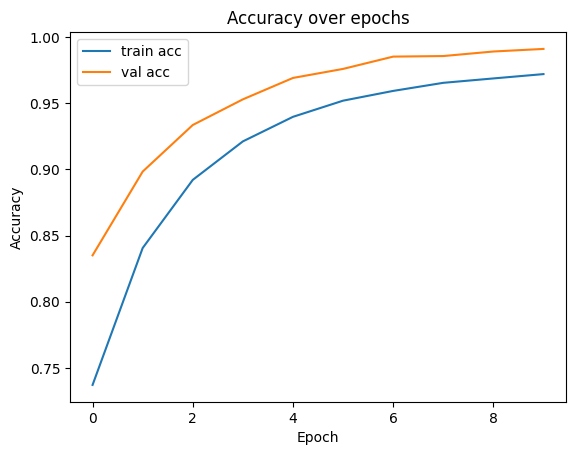

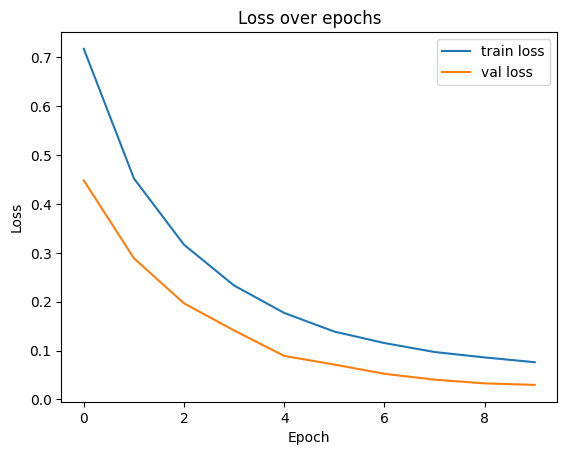

In [31]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [32]:
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc:.2f}, Loss: {val_loss:.2f}")


964/964 ━━━━━━━━━━━━━━━━━━━━ 172s 178ms/step - accuracy: 0.9944 - loss: 0.0183
Validation Accuracy: 0.99, Loss: 0.03


In [24]:
!pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get all predictions at once
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)

# Get true labels from generator
y_true = []
for _, batch_y in val_gen:
    y_true.extend(np.argmax(batch_y, axis=1))
    if len(y_true) >= len(val_gen) * val_gen.batch_size:
        break
y_true = np.array(y_true[:len(y_pred)])  # Trim to match y_pred length

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_gen.labels,
            yticklabels=val_gen.labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_true, y_pred, target_names=val_gen.labels)
print("Classification Report:\n")
print(report)


1034/1034 ━━━━━━━━━━━━━━━━━━━━ 190s 183ms/step


KeyboardInterrupt: 

In [26]:
##We finished with pretraining the model, let's start refining it

file_path = r"C:\Users\miama\Desktop\alzheimer\all-mg-codes.txt"

with open(file_path, 'r') as f:
    lines = f.readlines()

# Preview first few lines
for line in lines[:20]:
    print(line.strip())


im0001	7		Background Diabetic Retinopathy
im0002	13 9		Choroidal Neovascularization AND Arteriosclerotic Retinopathy
im0003	14	        Drusen, large AND Geographic Atrophy RPE"
im0004	14 3		Cilio-Retinal Artery Occlusion OR Central Retinal Artery Occlusion
im0005	3 5		Central Retinal Artery Occlusion AND Central Retinal Vein Occlusion
im0006	14		Drusen
im0007	13 14 9 10	Choroidal Neovascularization AND Age Related Macular Degeneration AND ASR &HTR
im0008	13 14 9	        Choroidal Neovascularization AND Age Related Macular Degeneration AND ASR
im0009	7		Background Diabetic Retinopathy
im0010	14		Histoplasmosis
im0011	13 14		Choroidal Neovascularization AND Histoplasmosis
im0012	14		Drusen
im0013	7		Background Diabetic Retinopathy
im0014	14		Nevus
im0015	14	        Drusen
im0016	7		Background Diabetic Retinopathy
im0017	13		Choroidal Neovascularization
im0018	5		Central Retinal Vein Occlusion, compensated
im0019	5		Central Retinal Vein Occlusion
im0020	3 5		Central Retinal Artery Occlusi

In [27]:
import re

file_path = r"C:\Users\miama\Desktop\alzheimer\all-mg-codes.txt"

with open(file_path, 'r') as f:
    lines = f.readlines()

label_map = {}

def clean_label(label):
    # Remove extra underscores and standardize
    return re.sub('_+', '_', label.strip().replace(" ", "_"))

for line in lines:
    parts = line.strip().split()
    if len(parts) >= 2:
        filename = parts[0] + ".npy"  # Add extension
        label = clean_label(" ".join(parts[1:]))
        label_map[filename] = label


In [28]:
# Example collapse map (define based on your task)
collapse_dict = {
    "7_Background_Diabetic_Retinopathy": "Diabetic_Retinopathy",
    "14_Drusen__large": "Drusen",
    # Add more if needed...
}

# Apply collapsing
for k in label_map:
    original = label_map[k]
    label_map[k] = collapse_dict.get(original, original)


In [30]:
import os
import shutil
import random

source_dir = r"C:\Users\miama\Desktop\alzheimer\STARE_npy"
output_base = r"C:\Users\miama\Desktop\alzheimer\STARE_split"
split_ratio = 0.8  # 80/20 train/val

# Create folders
os.makedirs(os.path.join(output_base, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_base, 'val'), exist_ok=True)

# Group by label
label_to_files = {}
for filename, label in label_map.items():
    full_path = os.path.join(source_dir, filename)
    if os.path.exists(full_path):
        label_to_files.setdefault(label, []).append(full_path)

# Shuffle and split into train/val
for label, files in label_to_files.items():
    random.shuffle(files)
    split_idx = int(len(files) * split_ratio)
    train_files = files[:split_idx]
    val_files = files[split_idx:]

    for subset, subset_files in [('train', train_files), ('val', val_files)]:
        label_dir = os.path.join(output_base, subset, label)
        os.makedirs(label_dir, exist_ok=True)
        for file in subset_files:
            shutil.copy(file, os.path.join(label_dir, os.path.basename(file)))


In [31]:
import numpy as np
import tensorflow as tf

def npy_data_generator(filepaths, labels, batch_size, classes, shuffle=True):
    def generator():
        i = 0
        data = list(zip(filepaths, labels))
        if shuffle:
            np.random.shuffle(data)
        while True:
            batch_data = data[i:i+batch_size]
            images, batch_labels = [], []
            for path, label in batch_data:
                img = np.load(path)
                if img.ndim == 2:
                    img = np.stack([img]*3, axis=-1)
                images.append(img)
                batch_labels.append(classes.index(label))
            images = np.array(images).astype(np.float32) / 255.0
            labels_array = tf.keras.utils.to_categorical(batch_labels, num_classes=len(classes))
            yield images, labels_array
            i += batch_size
            if i >= len(data):
                i = 0
                if shuffle:
                    np.random.shuffle(data)
    return generator


In [32]:
from glob import glob

train_dir = os.path.join(output_base, 'train')
val_dir = os.path.join(output_base, 'val')

def get_filepaths_and_labels(base_dir):
    all_paths = glob(os.path.join(base_dir, '**', '*.npy'), recursive=True)
    all_labels = [os.path.basename(os.path.dirname(p)) for p in all_paths]
    return all_paths, all_labels

train_filepaths, train_labels = get_filepaths_and_labels(train_dir)
val_filepaths, val_labels = get_filepaths_and_labels(val_dir)

# Unique class list
classes = sorted(set(train_labels + val_labels))


In [33]:
batch_size = 32

train_gen = tf.data.Dataset.from_generator(
    npy_data_generator(train_filepaths, train_labels, batch_size, classes),
    output_signature=(
        tf.TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, len(classes)), dtype=tf.float32)
    )
)

val_gen = tf.data.Dataset.from_generator(
    npy_data_generator(val_filepaths, val_labels, batch_size, classes),
    output_signature=(
        tf.TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, len(classes)), dtype=tf.float32)
    )
)

train_steps = len(train_filepaths) // batch_size
val_steps = len(val_filepaths) // batch_size


In [34]:
from tensorflow import keras

num_classes = len(classes)

base_model = keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(256, 256, 3),
    pooling='avg'
)

x = base_model.output
x = keras.layers.Dense(128, activation='relu')(x)
output = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.models.Model(inputs=base_model.input, outputs=output)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [35]:
history = model.fit(
    train_gen,
    steps_per_epoch=train_steps,
    validation_data=val_gen,
    validation_steps=val_steps,
    epochs=10
)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.0692 - loss: 3.7890 - val_accuracy: 0.1312 - val_loss: 3.6840
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 883ms/step - accuracy: 0.1476 - loss: 3.5567 - val_accuracy: 0.1375 - val_loss: 3.5938
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 862ms/step - accuracy: 0.1654 - loss: 3.4392 - val_accuracy: 0.1500 - val_loss: 3.5407
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 860ms/step - accuracy: 0.1675 - loss: 3.3324 - val_accuracy: 0.1562 - val_loss: 3.5484
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 851ms/step - accuracy: 0.1633 - loss: 3.3334 - val_accuracy: 0.1250 - val_loss: 3.6626
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 866ms/step - accuracy: 0.1131 - loss: 3.4127 - val_accuracy: 0.0812 - val_loss: 3.6034
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 865ms/step - accuracy: 0.0981 - loss: 3.3459 - val_accuracy: 0.1437 - val_loss: 3.5578
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 858ms/step - accuracy: 0.1384 - loss: 3.3554 - val_accuracy: 0.1500 - val_loss: 3

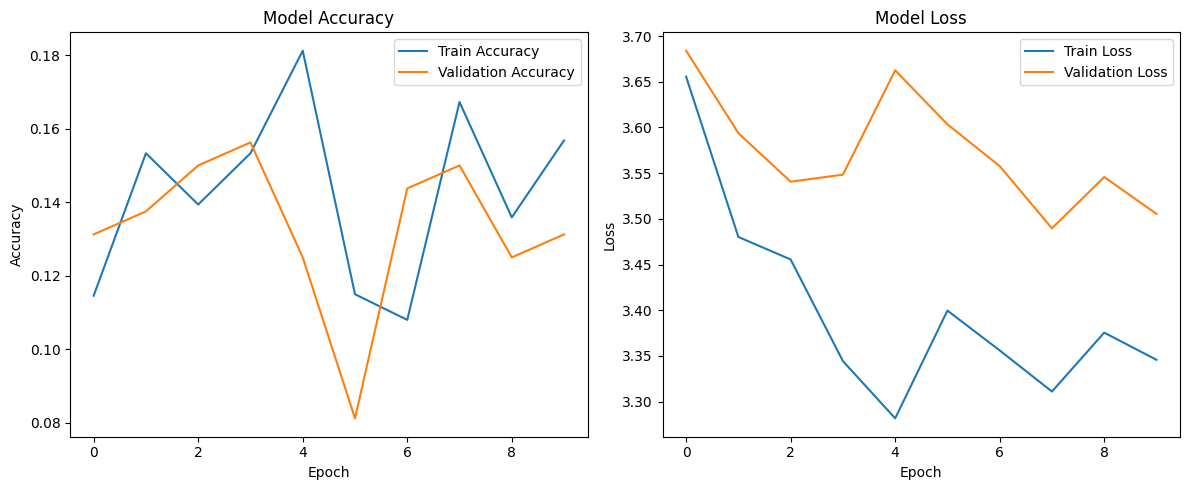

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


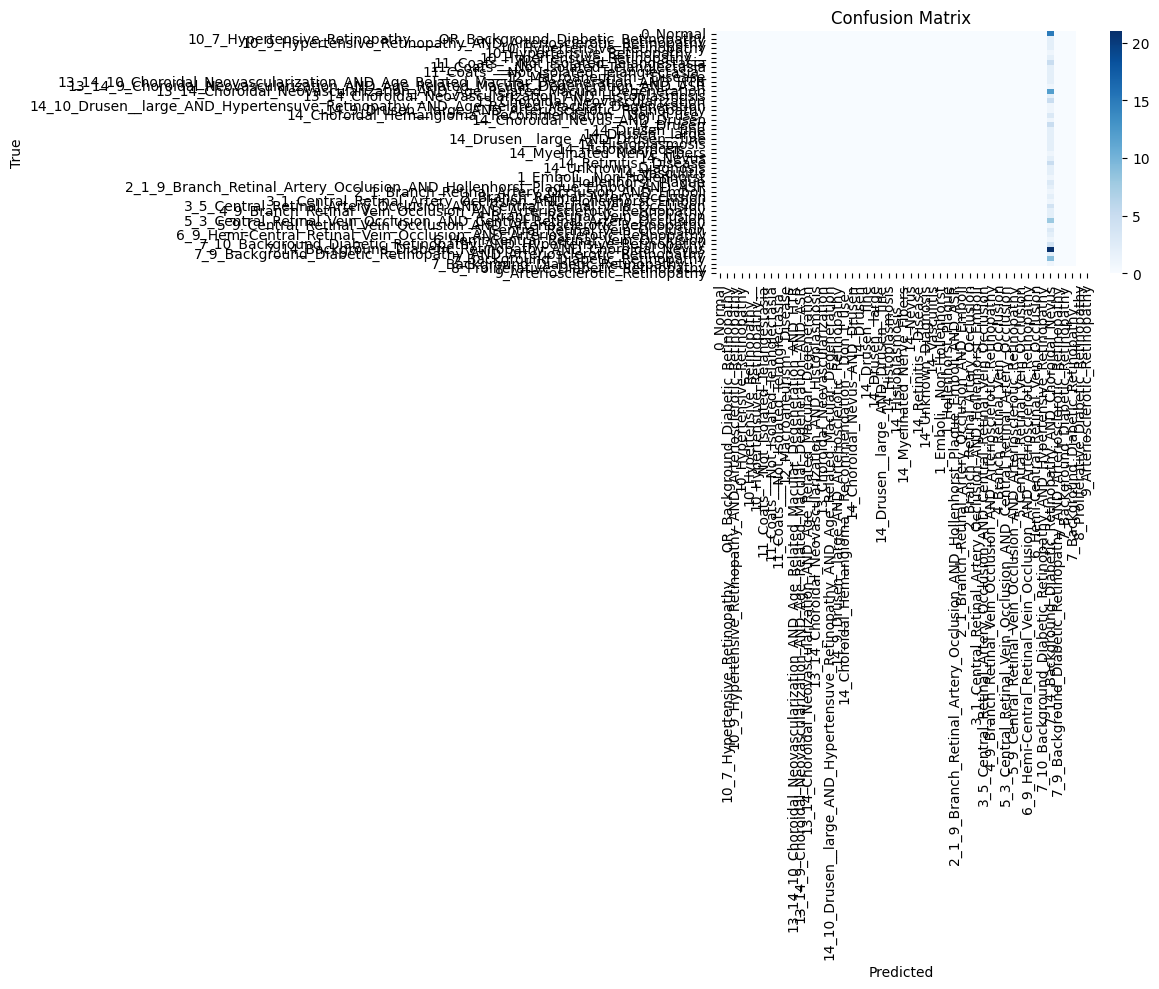

Classification Report:



ValueError: Number of classes, 49, does not match size of target_names, 51. Try specifying the labels parameter

In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels and predictions
y_true = []
y_pred = []

for batch_images, batch_labels in val_gen.take(val_steps):
    preds = model.predict(batch_images)
    y_true.extend(np.argmax(batch_labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=classes))


In [ ]:
#import os
#import shutil
#import re

## Path to the mapping file
#txt_file = r"C:\Users\miama\Desktop\alzheimer\all-mg-codes.txt"

## Path to preprocessed .npy files
#npy_dir = r"C:\Users\miama\Desktop\alzheimer\STARE_preprocessed"

## Output directory to organize files into class folders
#output_dir = r"C:\Users\miama\Desktop\alzheimer\STARE_organized"
#os.makedirs(output_dir, exist_ok=True)

#def clean_label(label):
    ## Remove special characters and spaces for folder names
    #return re.sub(r'[^A-Za-z0-9_\-]', '_', label.strip())

## Read lines
#with open(txt_file, 'r') as f:
 #   lines = f.readlines()

#missing_files = []

#for line in lines:
 #   parts = line.strip().split()
 #   if len(parts) < 2:
 #       continue

#    base_name = parts[0] + ".npy"
#    label = " ".join(parts[1:])  # full label (may be multi-word)
#    label_clean = clean_label(label)

    ## Create label folder
#    label_folder = os.path.join(output_dir, label_clean)
#    os.makedirs(label_folder, exist_ok=True)

    ## Copy file
#    src_file = os.path.join(npy_dir, base_name)
#    dst_file = os.path.join(label_folder, base_name)

#    if os.path.exists(src_file):
#        shutil.copy2(src_file, dst_file)
#    else:
#        missing_files.append(base_name)

#print(f"✅ Done! Files organized into {len(os.listdir(output_dir))} folders.")
#if missing_files:
#    print(f"⚠️ {len(missing_files)} files not found:")
#    for name in missing_files[:10]:
#        print(f"  - {name}")


In [ ]:
#import os
#import shutil
#import random

## Source: the folder with class subfolders
#source_dir = r"C:\Users\miama\Desktop\alzheimer\STARE_organized"

## Destination: where we’ll put the split version
#output_base = r"C:\Users\miama\Desktop\alzheimer\STARE_split"
#train_dir = os.path.join(output_base, "train")
#val_dir = os.path.join(output_base, "val")

## Create destination dirs
#os.makedirs(train_dir, exist_ok=True)
#os.makedirs(val_dir, exist_ok=True)

## Set split ratio
#split_ratio = 0.8

#for class_name in os.listdir(source_dir):
#    class_path = os.path.join(source_dir, class_name)
#    if not os.path.isdir(class_path):
#        continue

#    files = [f for f in os.listdir(class_path) if f.endswith(".npy")]
 #   if len(files) < 2:
 #       print(f"⚠️ Skipping '{class_name}' (only {len(files)} file(s))")
 #       continue

#    random.shuffle(files)
#    split_idx = int(len(files) * split_ratio)
#    train_files = files[:split_idx]
#    val_files = files[split_idx:]

    ## Train
#    train_class_dir = os.path.join(train_dir, class_name)
#    os.makedirs(train_class_dir, exist_ok=True)
#    for f in train_files:
#        shutil.copy2(os.path.join(class_path, f), os.path.join(train_class_dir, f))

    ## Val
#    val_class_dir = os.path.join(val_dir, class_name)
#    os.makedirs(val_class_dir, exist_ok=True)
#    for f in val_files:
#        shutil.copy2(os.path.join(class_path, f), os.path.join(val_class_dir, f))

#print("✅ Done! Dataset split into:")
#print(f" - Train: {train_dir}")
#print(f" - Val:   {val_dir}")


In [27]:
#import os

## Path to your training data
#train_dir = r'C:\Users\miama\Desktop\alzheimer\STARE_split\train'

## Get list of folder names (i.e., class names)
#classes = sorted([folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))])

## Print them nicely
#for i, cls in enumerate(classes):
#    print(f"{i+1}. {cls}")

## Optional: view how many
#print("\nTotal classes:", len(classes))



1. 0_Normal
2. 10_7_Hypertensive_Retinopathy____OR_Background_Diabetic_Retinopathy
3. 10_9_Hypertensive_Retinopathy_AND_Arteriosclerotic_Retinopathy
4. 10_Hypertensive_Retinopathy
5. 10_Hypertensive_Retinopathy__
6. 10_Hypertensuve_Retinopathy__
7. 11_Coats___Not_Isolated_Telangestasia
8. 11_Coats___Not_Isolated_Telangiectasia
9. 11_Coats___Not_Isolated_Telangiectasia_
10. 12_Macroaneurism__Disease
11. 13_14_10_Choroidal_Neovascularization_AND_Age_Related_Macular_Degeneration_AND_HTR
12. 13_14_9_Choroidal_Neovascularization_AND_Age_Related_Macular_Degeneration_AND_ASR
13. 13_14_Choroidal_Neovascularization_AND_Age_Related_Macular_Degeneration
14. 13_14_Choroidal_Neovascularization_AND_Histoplasmosis
15. 13_Choroidal_Neovascularization
16. 14_10_Drusen__large_AND_Hypertensuve_Retinopathy_AND_Age_Related_Macular_Degeneration
17. 14_9_Drusen__large_AND_Arteriosclerotic_Retinopathy
18. 14_Choroidal_Hemangioma__Recommendation__Don_t_use_
19. 14_Choroidal_Nevus_AND_Drusen
20. 14_Drusen
21. 1

In [28]:
#label_map = {
    ## Normal
    #"0_Normal": "Normal",

    ## Hypertensive Retinopathy
    #"10_7_Hypertensive_Retinopathy____OR_Background_Diabetic_Retinopathy": "Hypertensive_Retinopathy",
    #"10_9_Hypertensive_Retinopathy_AND_Arteriosclerotic_Retinopathy": "Hypertensive_Retinopathy",
    #"10_Hypertensive_Retinopathy": "Hypertensive_Retinopathy",
    #"10_Hypertensive_Retinopathy__": "Hypertensive_Retinopathy",
    #"10_Hypertensuve_Retinopathy__": "Hypertensive_Retinopathy",
    #"13_14_10_Choroidal_Neovascularization_AND_Age_Related_Macular_Degeneration_AND_HTR": "Hypertensive_Retinopathy",
    #"14_10_Drusen__large_AND_Hypertensuve_Retinopathy_AND_Age_Related_Macular_Degeneration": "Hypertensive_Retinopathy",
    #"7_10_Background_Diabetic_Retinopathy_AND_Hypertensive_Retinopathy": "Hypertensive_Retinopathy",

    ## Diabetic Retinopathy
    #"7_10_Background_Diabetic_Retinopathy_AND_Hypertensive_Retinopathy": "Diabetic_Retinopathy",
    #"7_14_Background_Diabetic_Retinopathy_AND_Choroidal_Nevus": "Diabetic_Retinopathy",
    #"7_9_Background_Diabetic_Retinopathy_AND_Arteriosclerotic_Retinopathy": "Diabetic_Retinopathy",
    #"7_Background_Diabetic_Retinopathy": "Diabetic_Retinopathy",
    #"7_Background_Diabetic_Retinopathy___": "Diabetic_Retinopathy",
    #"8_Proliferative_Diabetic_Retinopathy": "Diabetic_Retinopathy",

    ## Arteriosclerotic Retinopathy
    #"10_9_Hypertensive_Retinopathy_AND_Arteriosclerotic_Retinopathy": "Arteriosclerotic_Retinopathy",
    #"13_14_9_Choroidal_Neovascularization_AND_Age_Related_Macular_Degeneration_AND_ASR": "Arteriosclerotic_Retinopathy",
    #"14_9_Drusen__large_AND_Arteriosclerotic_Retinopathy": "Arteriosclerotic_Retinopathy",
    #"1_Emboli__Non-Hollenhorst": "Arteriosclerotic_Retinopathy",
    #"2_1_9_Branch_Retinal_Artery_Occlusion_AND_Hollenhorst_Plaque_Emboli_AND_ASR": "Arteriosclerotic_Retinopathy",
    #"4_9_Branch_Retinal_Vein_Occlusion_AND_Arteriosclerotic_Retinopathy": "Arteriosclerotic_Retinopathy",
    #"5_9_Central_Retinal_Vein_Occlusion_AND_Arteriosclerotic_Retinopathy": "Arteriosclerotic_Retinopathy",
    #"6_9_Hemi-Central_Retinal_Vein_Occlusion_AND_Arteriosclerotic_Retinopathy": "Arteriosclerotic_Retinopathy",
    #"7_9_Background_Diabetic_Retinopathy_AND_Arteriosclerotic_Retinopathy": "Arteriosclerotic_Retinopathy",
    #"9_Arteriosclerotic_Retinopathy": "Arteriosclerotic_Retinopathy",

    ## Choroidal/Neovascular/AMD
    #"13_14_Choroidal_Neovascularization_AND_Age_Related_Macular_Degeneration": "Choroidal_AMD",
    #"13_14_Choroidal_Neovascularization_AND_Histoplasmosis": "Choroidal_AMD",
    #"13_Choroidal_Neovascularization": "Choroidal_AMD",
    #"14_Choroidal_Hemangioma__Recommendation__Don_t_use_": "Choroidal_AMD",
    #"14_Choroidal_Nevus_AND_Drusen": "Choroidal_AMD",
    #"14_Drusen": "Choroidal_AMD",
    #"14_Drusen__fine": "Choroidal_AMD",
    #"14_Drusen__large": "Choroidal_AMD",
    #"14_Drusen__large_AND_Drusen__fine": "Choroidal_AMD",
    #"14_Histoplasmosis": "Choroidal_AMD",
    #"14_Histoplasmosis___": "Choroidal_AMD",
    #"14_Nevus": "Choroidal_AMD",

    ## Vascular Occlusion
    #"2_1_Branch_Retinal_Artery_Occlusion_AND_Emboli": "Vascular_Occlusion",
    #"2_Branch_Retinal_Artery_Occlusion": "Vascular_Occlusion",
    #"3_1_Central_Retinal_Artery_Occlusion_AND_Hollenhorst_Emboli": "Vascular_Occlusion",
    #"3_5_Central_Retinal_Artery_Occlusion_AND_Central_Retinal_Vein_Occlusion": "Vascular_Occlusion",
    #"4_Branch_Retinal_Vein_Occlusion": "Vascular_Occlusion",
    #"5_3_Central_Retinal_Vein_Occlusion_AND_Central_Retinal_Artery_Occlusion": "Vascular_Occlusion",
    #"5_Central_Retinal_Vein_Occlusion": "Vascular_Occlusion",
    #"6_Hemi-Central_Retinal_Vein_Occlusion": "Vascular_Occlusion",

    ## Emboli
    #"1_Emboli__Non-Hollenhorst": "Emboli",
    #"1_Hollenhorst_Plaque": "Emboli",
    #"2_1_Branch_Retinal_Artery_Occlusion_AND_Emboli": "Emboli",
    #3_1_Central_Retinal_Artery_Occlusion_AND_Hollenhorst_Emboli": "Emboli",

    ## Coats Disease
    #"11_Coats___Not_Isolated_Telangestasia": "Coats_Disease",
    #"11_Coats___Not_Isolated_Telangiectasia": "Coats_Disease",
    #"11_Coats___Not_Isolated_Telangiectasia_": "Coats_Disease",

    ## Other
    #"12_Macroaneurism__Disease": "Other",
    #"14_Myelinated_Nerve_Fibers": "Other",
    #"14_Retinitis__Disease": "Other",
    #"14_Unknown_Diagnosis": "Other",
    #"14_Vasculitis": "Other"
#}



In [32]:
#mapped_class_name = label_map.get(class_name, class_name)


In [33]:
#train_files = []
#for class_name in os.listdir(train_dir):
#    class_path = os.path.join(train_dir, class_name)
#    if os.path.isdir(class_path):
#        mapped_class_name = label_map.get(class_name, class_name)
#        for fname in os.listdir(class_path):
#            fpath = os.path.join(class_path, fname)
#            train_files.append((fpath, mapped_class_name))

            #Checkpoint


In [68]:
#import os

#train_dir = r'C:\Users\miama\Desktop\alzheimer\STARE_split\train'
#val_dir = r'C:\Users\miama\Desktop\alzheimer\STARE_split\val'

#def gather_files_and_labels(base_dir):
#    file_label_pairs = []
#    for class_folder in os.listdir(base_dir):
#        class_path = os.path.join(base_dir, class_folder)
#        if os.path.isdir(class_path):
#            label = class_folder  # or you can clean label if you want (e.g., remove number prefix)
#            for fname in os.listdir(class_path):
#                if fname.endswith('.npy'):
#                    full_path = os.path.join(class_path, fname)
#                    file_label_pairs.append((full_path, label))
#   return file_label_pairs

#train_files = gather_files_and_labels(train_dir)
#val_files = gather_files_and_labels(val_dir)

## Now you can safely unpack:
#train_filepaths, train_labels = zip(*train_files)
#val_filepaths, val_labels = zip(*val_files)

## Convert to lists (optional but recommended)
#train_filepaths = list(train_filepaths)
#train_labels = list(train_labels)
#val_filepaths = list(val_filepaths)
#val_labels = list(val_labels)

## Optional: map string labels to integer indices
#unique_labels = sorted(set(train_labels))  # e.g. ['0_Normal', '1_Emboli_Non-Holenhorst', ...]
#label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

#train_labels = [label_to_index[label] for label in train_labels]
#val_labels = [label_to_index[label] for label in val_labels]

#print("Classes:", unique_labels)
#print("Number of training samples:", len(train_filepaths))
#print("Number of validation samples:", len(val_filepaths))


Classes: ['0_Normal', '10_7_Hypertensive_Retinopathy____OR_Background_Diabetic_Retinopathy', '10_9_Hypertensive_Retinopathy_AND_Arteriosclerotic_Retinopathy', '10_Hypertensive_Retinopathy', '10_Hypertensive_Retinopathy__', '10_Hypertensuve_Retinopathy__', '11_Coats___Not_Isolated_Telangestasia', '11_Coats___Not_Isolated_Telangiectasia', '11_Coats___Not_Isolated_Telangiectasia_', '12_Macroaneurism__Disease', '13_14_10_Choroidal_Neovascularization_AND_Age_Related_Macular_Degeneration_AND_HTR', '13_14_9_Choroidal_Neovascularization_AND_Age_Related_Macular_Degeneration_AND_ASR', '13_14_Choroidal_Neovascularization_AND_Age_Related_Macular_Degeneration', '13_14_Choroidal_Neovascularization_AND_Histoplasmosis', '13_Choroidal_Neovascularization', '14_10_Drusen__large_AND_Hypertensuve_Retinopathy_AND_Age_Related_Macular_Degeneration', '14_9_Drusen__large_AND_Arteriosclerotic_Retinopathy', '14_Choroidal_Hemangioma__Recommendation__Don_t_use_', '14_Choroidal_Nevus_AND_Drusen', '14_Drusen', '14_Dr

In [69]:
#train_gen = tf.data.Dataset.from_generator(
#    npy_data_generator(train_filepaths, train_labels, batch_size, classes),
#    output_signature=(
#        tf.TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32),
#        tf.TensorSpec(shape=(None, len(classes)), dtype=tf.float32)
#    )
#)

#val_gen = tf.data.Dataset.from_generator(
#    npy_data_generator(val_filepaths, val_labels, batch_size, classes),
#    output_signature=(
#        tf.TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32),
#        tf.TensorSpec(shape=(None, len(classes)), dtype=tf.float32)
#    )
#)



In [70]:
#from tensorflow.keras.optimizers import Adam

## Unfreeze some layers if you want to fine-tune (optional)
#for layer in model.layers[-10:]:
#    layer.trainable = True

#model.compile(
#    optimizer=Adam(learning_rate=1e-4),
#    loss='categorical_crossentropy',
#    metrics=['accuracy']
#)


In [53]:
#import os

#train_dir = "C:/Users/miama/Desktop/alzheimer/STARE_split/train"
#classes = sorted(os.listdir(train_dir))
#num_classes = len(classes)

#print("Number of classes:", num_classes)
#print("Class names:", classes)


Number of classes: 51
Class names: ['0_Normal', '10_7_Hypertensive_Retinopathy____OR_Background_Diabetic_Retinopathy', '10_9_Hypertensive_Retinopathy_AND_Arteriosclerotic_Retinopathy', '10_Hypertensive_Retinopathy', '10_Hypertensive_Retinopathy__', '10_Hypertensuve_Retinopathy__', '11_Coats___Not_Isolated_Telangestasia', '11_Coats___Not_Isolated_Telangiectasia', '11_Coats___Not_Isolated_Telangiectasia_', '12_Macroaneurism__Disease', '13_14_10_Choroidal_Neovascularization_AND_Age_Related_Macular_Degeneration_AND_HTR', '13_14_9_Choroidal_Neovascularization_AND_Age_Related_Macular_Degeneration_AND_ASR', '13_14_Choroidal_Neovascularization_AND_Age_Related_Macular_Degeneration', '13_14_Choroidal_Neovascularization_AND_Histoplasmosis', '13_Choroidal_Neovascularization', '14_10_Drusen__large_AND_Hypertensuve_Retinopathy_AND_Age_Related_Macular_Degeneration', '14_9_Drusen__large_AND_Arteriosclerotic_Retinopathy', '14_Choroidal_Hemangioma__Recommendation__Don_t_use_', '14_Choroidal_Nevus_AND_Dr

In [ ]:
#def npy_data_generator(filepaths, labels, batch_size, classes, shuffle=True):
   # def generator():
     #   i = 0
     #   filepaths_local = list(filepaths)
     #   labels_local = list(labels)

     #   while True:
     #       batch_paths = filepaths_local[i:i+batch_size]
      #      batch_labels = labels_local[i:i+batch_size]
       #     images = []

        #    for path in batch_paths:
         #       img = np.load(path)
          #      if img.ndim == 2:
           #         img = np.stack([img]*3, axis=-1)
            #    images.append(img)

         #   images = np.array(images)
          #  labels_array = tf.keras.utils.to_categorical(batch_labels, num_classes=len(classes))
         #   yield images, labels_array

          #  i += batch_size
           # if i >= len(filepaths_local):
            #    i = 0
             #   if shuffle:
              #      combined = list(zip(filepaths_local, labels_local))
               #     np.random.shuffle(combined)
                #    filepaths_local, labels_local = zip(*combined)
                 #   filepaths_local = list(filepaths_local)
                  #  labels_local = list(labels_local)
                    
  #  return generator

In [ ]:
#train_filepaths = []
#train_labels = []

#for fname in train_files:
 #   full_path = os.path.join(train_dir, fname)
  #  train_filepaths.append(full_path)

    ## Extract class folder from path if folder structure is train/class_name/filename.npy
   # class_name = os.path.basename(os.path.dirname(full_path))  # get folder name
   # train_labels.append(class_name)

## Map classes to indices
#label_to_index = {label: idx for idx, label in enumerate(sorted(set(train_labels)))}
#train_labels = [label_to_index[label] for label in train_labels]

In [54]:
#num_classes = len(classes)


In [39]:
#from tensorflow import keras

#num_classes = len(classes)  # e.g. 51

#base_model = keras.applications.EfficientNetB0(
#    include_top=False,
#    weights="imagenet",
#    input_shape=(256, 256, 3),  # or (256, 256, 1) if you're using grayscale
#    pooling='avg'
#)

#x = base_model.output
#x = keras.layers.Dense(128, activation='relu')(x)
#output = keras.layers.Dense(num_classes, activation='softmax')(x)

#model = keras.models.Model(inputs=base_model.input, outputs=output)

## freeze base model if desired
#for layer in base_model.layers:
#    layer.trainable = False

#model.compile(
#    optimizer='adam',
#    loss='categorical_crossentropy',
#    metrics=['accuracy']
#)



In [71]:
#history = model.fit(
#    train_gen,
#    steps_per_epoch=train_steps,
#    validation_data=val_gen,
#    validation_steps=val_steps,
#    epochs=10  
#)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 500ms/step - accuracy: 0.0000e+00 - loss: 4.1534 - val_accuracy: 0.1000 - val_loss: 3.8464
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 386ms/step - accuracy: 0.0896 - loss: 3.9255 - val_accuracy: 0.1000 - val_loss: 3.8507
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.1488 - loss: 3.7630 - val_accuracy: 0.1000 - val_loss: 3.8501
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - accuracy: 0.0954 - loss: 3.7857 - val_accuracy: 0.1000 - val_loss: 3.8391
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.1258 - loss: 3.5971 - val_accuracy: 0.1000 - val_loss: 3.8226
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accuracy: 0.1208 - loss: 3.5494 - val_accuracy: 0.1000 - val_loss: 3.8024
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.1846 - loss: 3.3389 - val_accuracy: 0.1000 - val_loss: 3.7856
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.1800 - loss: 3.4633 - val_accurac

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.0333 - loss: 3.6579
Validation Loss: 3.7489, Validation Accuracy: 0.1000


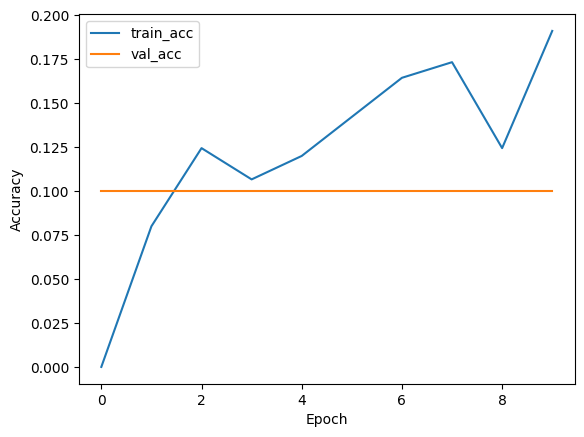

In [72]:
## Evaluate
#val_loss, val_acc = model.evaluate(val_gen, steps=val_steps)
#print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

## Plot training history
#import matplotlib.pyplot as plt

#plt.plot(history.history['accuracy'], label='train_acc')
#plt.plot(history.history['val_accuracy'], label='val_acc')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()


In [74]:
#from sklearn.utils.class_weight import compute_class_weight
#import numpy as np

#class_weights = compute_class_weight('balanced', classes=np.arange(num_classes), y=train_labels)
#class_weights_dict = dict(enumerate(class_weights))

#history = model.fit(
  #  train_gen,
 #   steps_per_epoch=train_steps,
#    validation_data=val_gen,
   # validation_steps=val_steps,
  #  epochs=10,
 #   class_weight=class_weights_dict
#)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 396ms/step - accuracy: 0.0634 - loss: 4.0899 - val_accuracy: 0.1000 - val_loss: 3.7427
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 392ms/step - accuracy: 0.1590 - loss: 4.4511 - val_accuracy: 0.1000 - val_loss: 3.7323
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 385ms/step - accuracy: 0.1321 - loss: 3.5131 - val_accuracy: 0.1000 - val_loss: 3.7241
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 380ms/step - accuracy: 0.1650 - loss: 4.4246 - val_accuracy: 0.1000 - val_loss: 3.7175
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 387ms/step - accuracy: 0.1227 - loss: 3.9616 - val_accuracy: 0.1000 - val_loss: 3.7081
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.1179 - loss: 3.4653 - val_accuracy: 0.1000 - val_loss: 3.7032
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.1031 - loss: 4.5100 - val_accuracy: 0.1000 - val_loss: 3.6992
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 381ms/step - accuracy: 0.1253 - loss: 3.8984 - val_accuracy: 0

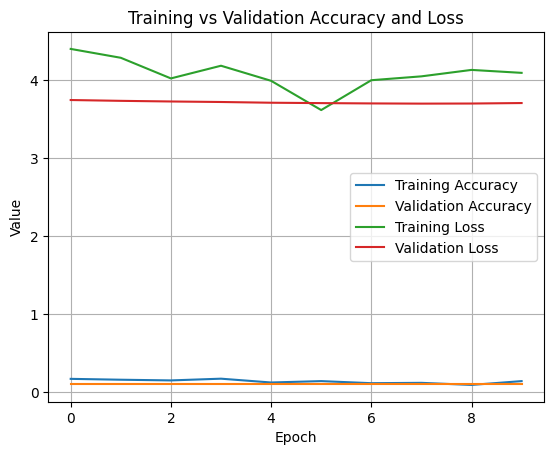

In [75]:
## Accuracy and loss curves
#plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.legend()
#plt.title('Training vs Validation Accuracy and Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Value')
#plt.grid(True)
#plt.show()


In [76]:
## Evaluate on validation set
#y_true = []
#y_pred = []

#for images, labels in val_gen:
   # preds = model.predict(images)
  #  y_true.extend(np.argmax(labels, axis=1))
 #   y_pred.extend(np.argmax(preds, axis=1))

   # if len(y_true) >= len(val_labels):  # Stop early to match dataset size
    #    break

## Confusion matrix and classification report
#cm = confusion_matrix(y_true, y_pred)
#print("Confusion Matrix:\n", cm)

#print("Classification Report:\n", classification_report(
  #  y_true, y_pred, labels=range(len(classes)), target_names=classes))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
                                                                                        precision    recall  f1-score   support

                                                                             0_Normal       0.00      0.00      0.00         7
                  10_7_Hypertensive_Retinopathy____OR_Background_Diabetic_Retinopathy       0.00      0.00      0.00         1
                       10_9_Hypertensive_Retinopathy_AND_Arteriosclerotic_Retinopathy       0.00      0.00      0.00         1
                                                          10_Hypertensive_Retinopathy       0.00 

C:\Users\miama\myenv\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\miama\myenv\lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\miama\myenv\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\miama\myenv\lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\miama\myenv\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50